<a href="https://colab.research.google.com/github/AsSakina/Code_Projects/blob/main/DNNs_CheckP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Checkpoint Objective
This dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.

What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.
#Instructions
In this assignment you will have to take the following steps:

Import your dataset and perform initial analysis and visualization
Clean the data
Build a  deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No)
You have to submit a jupyter notebook file.

Link : Get started with Google Colab

Please make sure it's a public shareable link.

#Importing Libraries ⬇

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler



#Get the Data ⚡

In [219]:
data = pd.read_csv('bank.csv')

In [220]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [222]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


#Handling Missing Values ⏳

In [223]:
print('Unique Values : ')
print('-----------------')
print('Education', data['education'].unique())
print('-----------------------------------------------------------------------')
print('Job', data['job'].unique())
print('-----------------------------------------------------------------------')
print('Marital', data['marital'].unique())
print('-----------------------------------------------------------------------')
print('Default', data['default'].unique())
print('-----------------------------------------------------------------------')
print('Housing', data['housing'].unique())
print('-----------------------------------------------------------------------')
print('Loan', data['loan'].unique())
print('-----------------------------------------------------------------------')
print('Contact', data['contact'].unique())
print('-----------------------------------------------------------------------')
print('Month', data['month'].unique())
print('-----------------------------------------------------------------------')
print('Poutcome', data['poutcome'].unique())
print('-----------------------------------------------------------------------')
print('Deposit', data['deposit'].unique())


Unique Values : 
-----------------
Education ['secondary' 'tertiary' 'primary' 'unknown']
-----------------------------------------------------------------------
Job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
-----------------------------------------------------------------------
Marital ['married' 'single' 'divorced']
-----------------------------------------------------------------------
Default ['no' 'yes']
-----------------------------------------------------------------------
Housing ['yes' 'no']
-----------------------------------------------------------------------
Loan ['no' 'yes']
-----------------------------------------------------------------------
Contact ['unknown' 'cellular' 'telephone']
-----------------------------------------------------------------------
Month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
-----------------------------

In [224]:
most_frequent_values = data.mode().iloc[0]
most_frequent_values

age                  31
job          management
marital         married
education     secondary
default              no
balance               0
housing              no
loan                 no
contact        cellular
day                  20
month               may
duration             97
campaign              1
pdays                -1
previous              0
poutcome        unknown
deposit              no
Name: 0, dtype: object

In [225]:
#Replace the specific value with the most frequent value in each column
specific_value = 'unknown'  # Replace this value with the most frequent value in each column

for col in data.columns:
    data[col] = data[col].replace(specific_value, most_frequent_values[col])

In [226]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,cellular,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#Visualization 💠

**Plot Age Distribution** 🌼

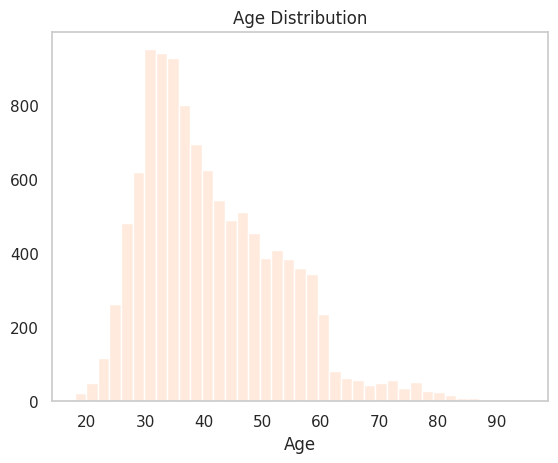

In [227]:
x = data['age']
plt.hist(x, bins=39, color='#FFEADD')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.grid()
plt.show()

**Create a scatterplot of age versus balance where the points are colored by the job column.** 📈

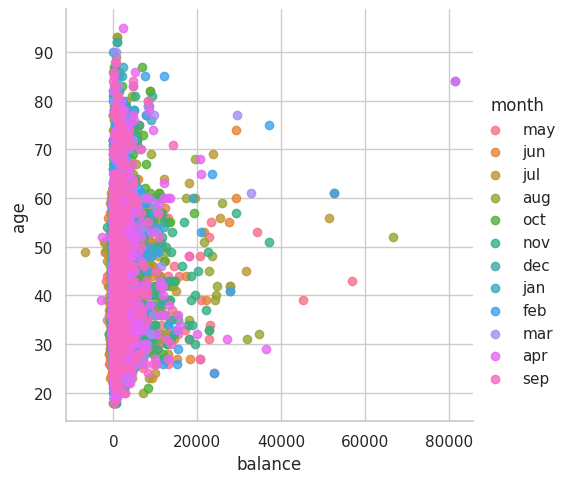

In [228]:
sns.set_style('whitegrid')
sns.lmplot(x = 'balance', y = 'age', data = data, fit_reg = False, hue = 'month', aspect = 1)


**Create a stacked histogram showing age based on the marital column.** 📊

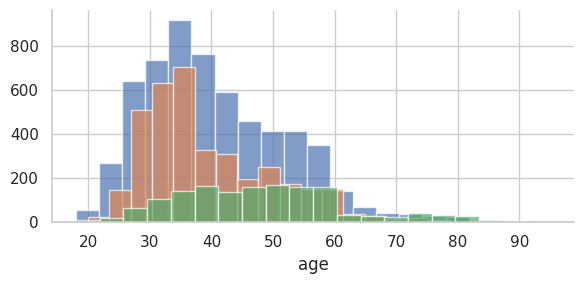

In [229]:
#HIST
plot = sns.FacetGrid(data, hue = 'education', aspect = 2)
plot = plot.map(plt.hist, 'age', bins = 20, alpha = 0.7)


#Blue = Married
#Orange = Single
#Green = Divorced

**Pairplot with the hue defined by job** 🌀

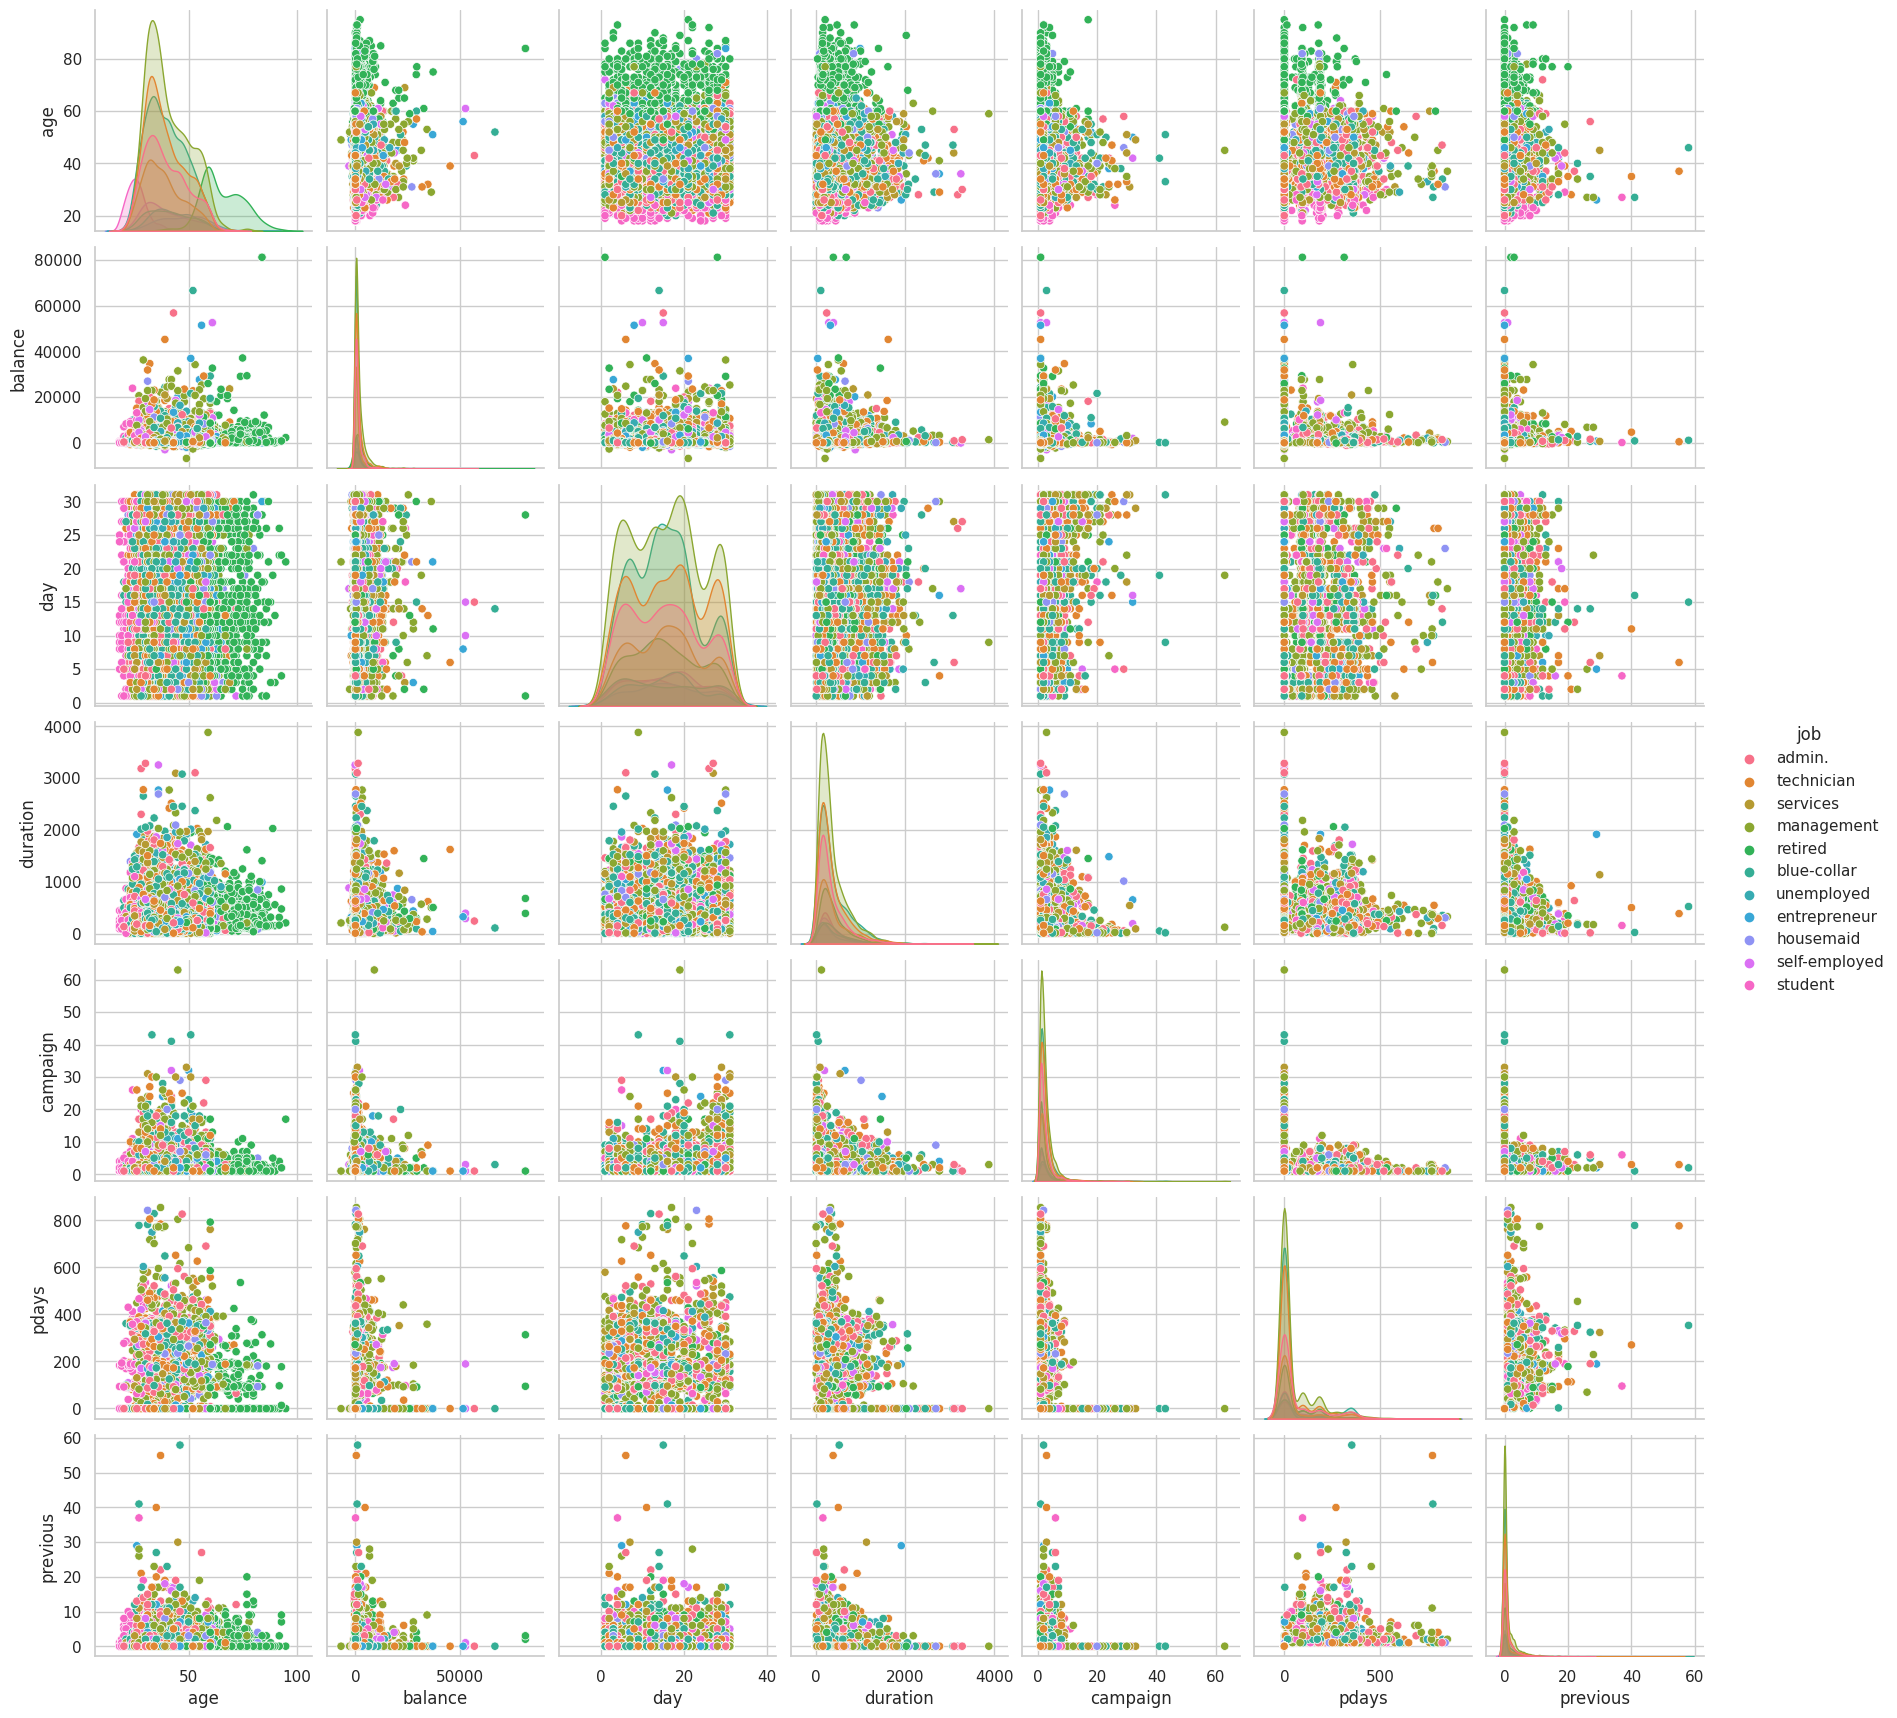

In [230]:
sns.set_style('whitegrid')
sns.pairplot(data, hue = 'job')

**Scatter Plot using JoinPlot for Previous and Pdays** 🌲

<ipython-input-231-bde84ff6c698>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



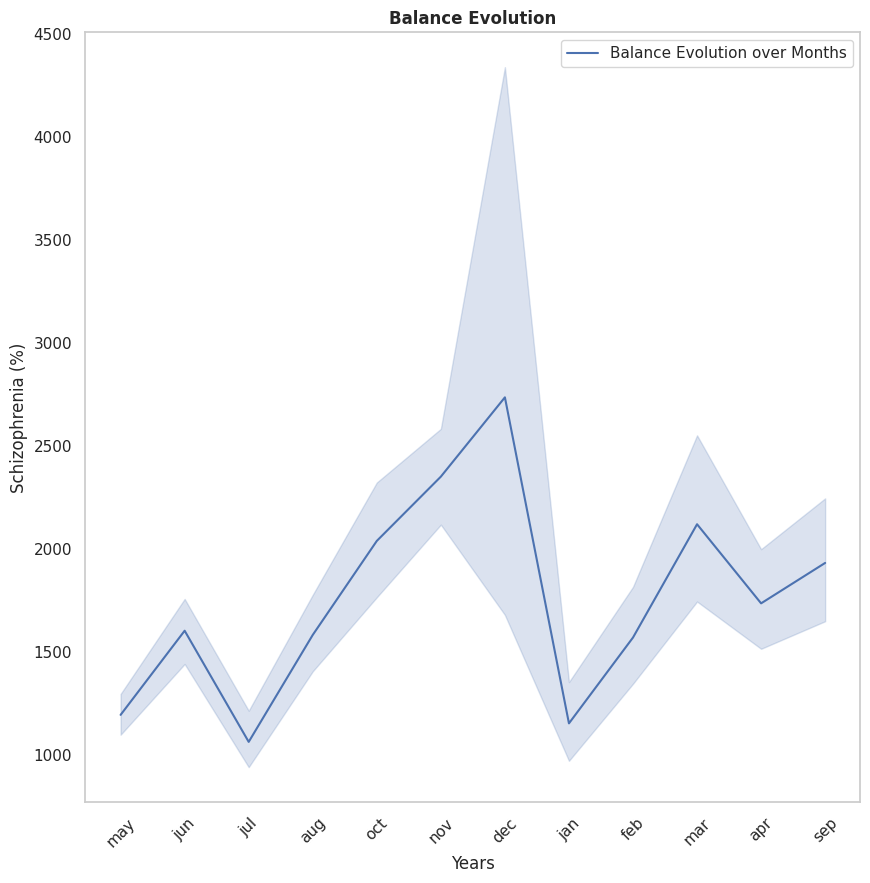

In [231]:
plt.figure(figsize = (10,10))
sns.set_style('whitegrid')

plot = sns.lineplot(data=data, x="month", y="balance", label="Balance Evolution over Months")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

plt.title('Balance Evolution',
          fontweight='bold')
plt.ylabel('Schizophrenia (%)')
plt.xlabel('Years')
#plt.setp( xaxis.get_majorticklabels(),  rotation=-45)


plt.grid(False)

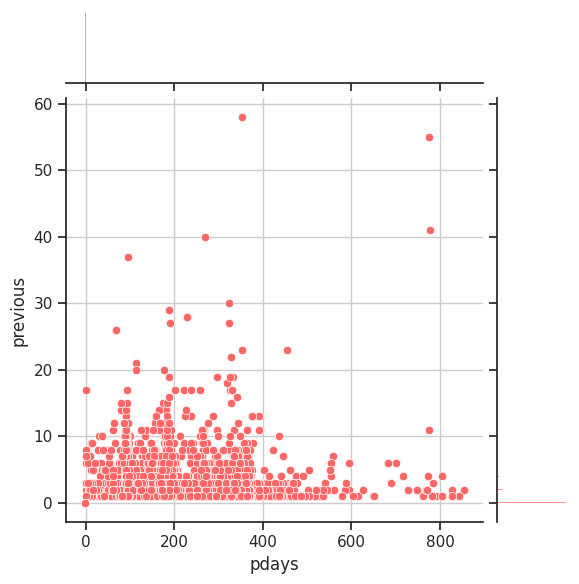

In [232]:
sns.set(style="ticks")
exercise = sns.jointplot(data=data, x="pdays", y="previous", color='#FF6666')
plt.grid()  #just add this
plt.show()

<ipython-input-233-a64cf0e24a87>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



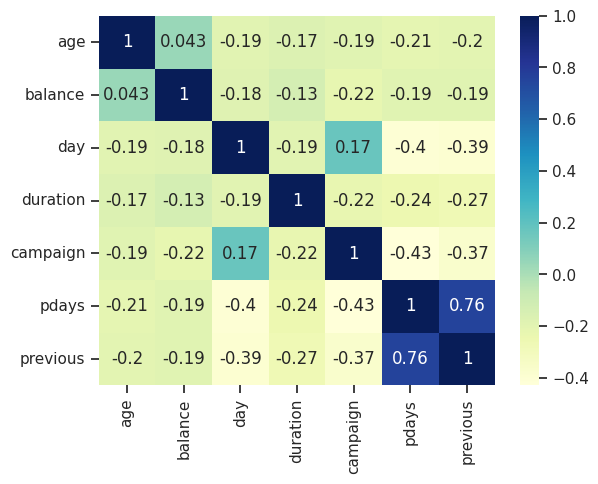

In [233]:
#Correlation

corr = data[data.columns[0:]].corr()
corr = sns.heatmap(corr.corr(), cmap="YlGnBu", annot=True)

In [234]:
#create area chart
fig = px.area(data, x='month', y='duration')

#Set axis
fig.update_layout(
    title='Duration over months',
    xaxis_title='month',
    yaxis_title='duration'
)

#show chart
fig.show()


#Deep Learning Network 🤖

**Encode our Categorical Values using GETDUMMIES ⚒**

In [235]:
#encoded = pd.get_dummies(data, drop_first=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [236]:
df=pd.DataFrame(data,columns=["education"])
dicti = {'primary': 1,'secondary': 2,'tertiary': 3}
data["education"] = df.education.map(dicti)



In [237]:
df=pd.DataFrame(data,columns=["marital"])
dicti = {'married': 1,'single': 2,'divorced': 3}
data["marital"] = df.marital.map(dicti)

df=pd.DataFrame(data,columns=["default"])
dicti = {'yes': 1,'no': 0}
data["default"] = df.default.map(dicti)


df=pd.DataFrame(data,columns=["housing"])
dicti = {'yes': 1,'no': 0}
data["housing"] = df.housing.map(dicti)


df=pd.DataFrame(data,columns=["loan"])
dicti = {'yes': 1,'no': 0}
data["loan"] = df.loan.map(dicti)


df=pd.DataFrame(data,columns=["contact"])
dicti = {'cellular': 1,'telephone': 2}
data["contact"] = df.contact.map(dicti)


df=pd.DataFrame(data,columns=["poutcome"])
dicti = {'unknown': 0, 'other' : 1, 'failure' : 2,  'success' : 3}
data["poutcome"] = df.poutcome.map(dicti)


df=pd.DataFrame(data,columns=["deposit"])
dicti = {'no': 0, 'yes' : 1}
data["deposit"] = df.deposit.map(dicti)



In [238]:
# Remove two columns name is 'job' and 'month'
data = data.drop(['job', 'month'], axis=1)

In [239]:
data

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,2,0,2343,1,0,1,5,1042,1,-1,0,0,1
1,56,1,2,0,45,0,0,1,5,1467,1,-1,0,0,1
2,41,1,2,0,1270,1,0,1,5,1389,1,-1,0,0,1
3,55,1,2,0,2476,1,0,1,5,579,1,-1,0,0,1
4,54,1,3,0,184,0,0,1,5,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,1,0,1,1,0,1,20,257,1,-1,0,0,0
11158,39,1,2,0,733,0,0,1,16,83,4,-1,0,0,0
11159,32,2,2,0,29,0,0,1,19,156,2,-1,0,0,0
11160,43,1,2,0,0,0,1,1,8,9,2,172,5,2,0


In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   marital    11162 non-null  int64
 2   education  11162 non-null  int64
 3   default    11162 non-null  int64
 4   balance    11162 non-null  int64
 5   housing    11162 non-null  int64
 6   loan       11162 non-null  int64
 7   contact    11162 non-null  int64
 8   day        11162 non-null  int64
 9   duration   11162 non-null  int64
 10  campaign   11162 non-null  int64
 11  pdays      11162 non-null  int64
 12  previous   11162 non-null  int64
 13  poutcome   11162 non-null  int64
 14  deposit    11162 non-null  int64
dtypes: int64(15)
memory usage: 1.3 MB


DNNs 🦾

In [241]:
#Split Features and Target Variables
X = data.drop('deposit', axis=1)
y = data['deposit']

In [242]:
#Test and Train Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [243]:
#Normalize our Data : Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [244]:
from keras.callbacks import EarlyStopping

mycallbacks = [EarlyStopping(monitor='val_loss', patience=2)]


In [245]:
#Create our model

model = Sequential()
model.add(Dense(24, input_dim=14, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(56, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))




In [246]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 24)                360       
                                                                 
 dropout_64 (Dropout)        (None, 24)                0         
                                                                 
 dense_91 (Dense)            (None, 12)                300       
                                                                 
 dropout_65 (Dropout)        (None, 12)                0         
                                                                 
 dense_92 (Dense)            (None, 56)                728       
                                                                 
 dropout_66 (Dropout)        (None, 56)                0         
                                                                 
 dense_93 (Dense)            (None, 20)              

In [247]:
#Define Optimizer, loss function and Metrics
optimizer = Adam(lr = 0.15)
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [248]:
#Fit our model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks = mycallbacks)


Epoch 1/30
252/252 [==============================] - 2s 3ms/step - loss: 0.4764 - accuracy: 0.5243 - val_loss: 0.4546 - val_accuracy: 0.5454
Epoch 2/30
252/252 [==============================] - 1s 4ms/step - loss: 0.4747 - accuracy: 0.5253 - val_loss: 0.4546 - val_accuracy: 0.5454
Epoch 3/30
252/252 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.6098 - val_loss: 0.2561 - val_accuracy: 0.7772
Epoch 4/30
252/252 [==============================] - 1s 4ms/step - loss: 0.3056 - accuracy: 0.7445 - val_loss: 0.2129 - val_accuracy: 0.8063
Epoch 5/30
252/252 [==============================] - 1s 3ms/step - loss: 0.2728 - accuracy: 0.7740 - val_loss: 0.2097 - val_accuracy: 0.8130
Epoch 6/30
252/252 [==============================] - 1s 3ms/step - loss: 0.2608 - accuracy: 0.7855 - val_loss: 0.2079 - val_accuracy: 0.8141
Epoch 7/30
252/252 [==============================] - 1s 3ms/step - loss: 0.2489 - accuracy: 0.7938 - val_loss: 0.2002 - val_accuracy: 0.8163
Epoch 

In [249]:
#Evaluate our model

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

70/70 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.7949
Loss: 0.2189147174358368, Accuracy: 0.7948947548866272


In [250]:
#Predictions

predictions = model.predict(X_test)

70/70 [==============================] - 0s 2ms/step
